In [8]:
import pandas as pd

# Function to clean a dataset
def clean_dataset(file_path):
    # Read the dataset with a semicolon delimiter
    df = pd.read_csv(file_path, delimiter=';')
    
    # Display basic information about the dataset to ensure it's loaded correctly
    print(f"Dataset: {file_path}")
    print(df.head())
    print(df.info())
    print("\n")
    
    return df

# File paths for the datasets
file_paths = [
    'C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 1_EV charging reports.csv',
    'C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 2_Hourly EV loads - Per user.csv',
    'C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 3a_Hourly EV loads - Aggregated private.csv',
    'C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 3b_Hourly EV loads - Aggregated shared.csv',
    'C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 5_AMS data from garage Bl2.csv',
    'C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 6_Local traffic distribution.csv',
    'C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Norway_Trondheim_ExactLoc_Weather.csv'
]

# Clean each dataset
datasets = {file_path: clean_dataset(file_path) for file_path in file_paths}

# If you want to save the cleaned datasets back to CSV files (optional)
for file_path, df in datasets.items():
    output_path = file_path.replace('.csv', '_cleaned.csv')
    df.to_csv(output_path, index=False)
    print(f"Saved cleaned dataset to: {output_path}")


Dataset: C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 1_EV charging reports.csv
   session_ID Garage_ID User_ID User_type Shared_ID      Start_plugin  \
0           1      AdO3  AdO3-4   Private       NaN  21.12.2018 10:20   
1           2      AdO3  AdO3-4   Private       NaN  21.12.2018 10:24   
2           3      AdO3  AdO3-4   Private       NaN  21.12.2018 11:33   
3           4      AdO3  AdO3-2   Private       NaN  22.12.2018 16:15   
4           5      AdO3  AdO3-2   Private       NaN  24.12.2018 22:03   

   Start_plugin_hour       End_plugout  End_plugout_hour El_kWh  \
0                 10  21.12.2018 10:23              10.0    0,3   
1                 10  21.12.2018 10:32              10.0   0,87   
2                 11  21.12.2018 19:46              19.0  29,87   
3                 16  23.12.2018 16:40              16.0  15,56   
4                 22  24.12.2018 23:02              23.0   3,62   

  Duration_hours month_plugin weekdays_pl

Cleaned dataload

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned datasets
df_ev_reports = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 1_EV charging reports_cleaned.csv')
df_hourly_ev_user = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 2_Hourly EV loads - Per user_cleaned.csv')
df_hourly_ev_private = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 3a_Hourly EV loads - Aggregated private_cleaned.csv')
df_hourly_ev_shared = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 3b_Hourly EV loads - Aggregated shared_cleaned.csv')
df_ams_garage = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 5_AMS data from garage Bl2_cleaned.csv')
df_traffic = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 6_Local traffic distribution_cleaned.csv')
df_weather = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Norway_Trondheim_ExactLoc_Weather_cleaned.csv')

# Display basic information about each dataset to ensure they are loaded correctly
for df, name in zip([df_ev_reports, df_hourly_ev_user, df_hourly_ev_private, df_hourly_ev_shared, df_ams_garage, df_traffic, df_weather],
                    ['EV Charging Reports', 'Hourly EV Loads - Per User', 'Hourly EV Loads - Aggregated Private', 'Hourly EV Loads - Aggregated Shared',
                     'AMS Data from Garage', 'Local Traffic Distribution', 'Weather Data']):
    print(f"{name}:\n")
    print(df.head())
    print(df.info())
    print("\n")


Matplotlib is building the font cache; this may take a moment.


EV Charging Reports:

   session_ID Garage_ID User_ID User_type Shared_ID      Start_plugin  \
0           1      AdO3  AdO3-4   Private       NaN  21.12.2018 10:20   
1           2      AdO3  AdO3-4   Private       NaN  21.12.2018 10:24   
2           3      AdO3  AdO3-4   Private       NaN  21.12.2018 11:33   
3           4      AdO3  AdO3-2   Private       NaN  22.12.2018 16:15   
4           5      AdO3  AdO3-2   Private       NaN  24.12.2018 22:03   

   Start_plugin_hour       End_plugout  End_plugout_hour El_kWh  \
0                 10  21.12.2018 10:23              10.0    0,3   
1                 10  21.12.2018 10:32              10.0   0,87   
2                 11  21.12.2018 19:46              19.0  29,87   
3                 16  23.12.2018 16:40              16.0  15,56   
4                 22  24.12.2018 23:02              23.0   3,62   

  Duration_hours month_plugin weekdays_plugin             Plugin_category  \
0           0,05          Dec          Friday         late 

In [15]:
# Display columns of each dataset to ensure they are loaded correctly
for df, name in zip([df_ev_reports, df_hourly_ev_user, df_hourly_ev_private, df_hourly_ev_shared, df_ams_garage, df_traffic, df_weather],
                    ['EV Charging Reports', 'Hourly EV Loads - Per User', 'Hourly EV Loads - Aggregated Private', 'Hourly EV Loads - Aggregated Shared',
                     'AMS Data from Garage', 'Local Traffic Distribution', 'Weather Data']):
    print(f"{name} Columns:\n {df.columns}\n")

EV Charging Reports Columns:
 Index(['session_ID', 'Garage_ID', 'User_ID', 'User_type', 'Shared_ID',
       'Start_plugin', 'Start_plugin_hour', 'End_plugout', 'End_plugout_hour',
       'El_kWh', 'Duration_hours', 'month_plugin', 'weekdays_plugin',
       'Plugin_category', 'Duration_category'],
      dtype='object')

Hourly EV Loads - Per User Columns:
 Index(['date_from', 'date_to', 'User_ID', 'session_ID', 'Synthetic_3_6kW',
       'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW'],
      dtype='object')

Hourly EV Loads - Aggregated Private Columns:
 Index(['date_from', 'daily_hour', 'weekday', 'month', 'Synthetic_3_6kW',
       'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW', 'n_private'],
      dtype='object')

Hourly EV Loads - Aggregated Shared Columns:
 Index(['date_from', 'daily_hour', 'weekday', 'month', 'Synthetic_3_6kW',
       'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW', 'n_shared'],
      dtype='object')

AMS Data from Garage Columns:
 Index(['date_from', 'date_to', 'month'

Data parsing

In [23]:
# Correctly parsing the date format with dayfirst=True
df_hourly_ev_private['date_from'] = pd.to_datetime(df_hourly_ev_private['date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_hourly_ev_private['hour'] = df_hourly_ev_private['date_from'].dt.hour

# Proceeding with calculations
private_hourly_avg_load = df_hourly_ev_private.groupby('hour')[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']].mean().reset_index()

In [24]:
# Correctly parsing the date format with dayfirst=True
df_hourly_ev_shared['date_from'] = pd.to_datetime(df_hourly_ev_shared['date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_hourly_ev_shared['hour'] = df_hourly_ev_shared['date_from'].dt.hour

# Proceeding with calculations
shared_hourly_avg_load = df_hourly_ev_shared.groupby('hour')[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']].mean().reset_index()

Hourly EV Loads - Per User

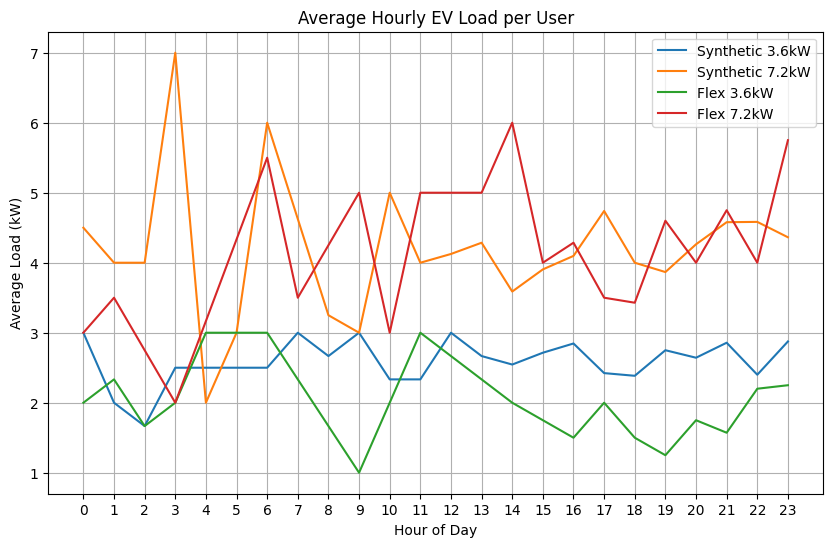

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_avg_load, x='hour', y='Synthetic_3_6kW', label='Synthetic 3.6kW')
sns.lineplot(data=hourly_avg_load, x='hour', y='Synthetic_7_2kW', label='Synthetic 7.2kW')
sns.lineplot(data=hourly_avg_load, x='hour', y='Flex_3_6kW', label='Flex 3.6kW')
sns.lineplot(data=hourly_avg_load, x='hour', y='Flex_7_2kW', label='Flex 7.2kW')
plt.title('Average Hourly EV Load per User')
plt.xlabel('Hour of Day')
plt.ylabel('Average Load (kW)')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()


Hourly EV Loads - Aggregated Private and Shared

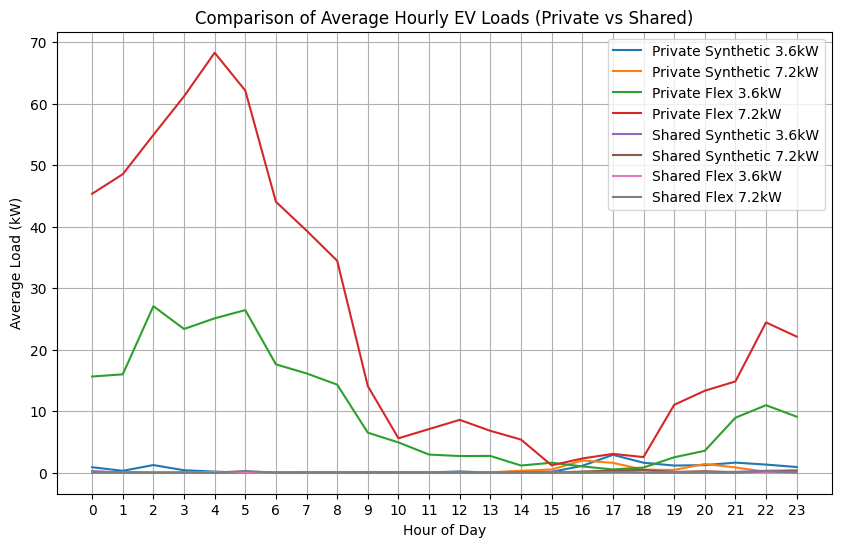

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=private_hourly_avg_load, x='hour', y='Synthetic_3_6kW', label='Private Synthetic 3.6kW')
sns.lineplot(data=private_hourly_avg_load, x='hour', y='Synthetic_7_2kW', label='Private Synthetic 7.2kW')
sns.lineplot(data=private_hourly_avg_load, x='hour', y='Flex_3_6kW', label='Private Flex 3.6kW')
sns.lineplot(data=private_hourly_avg_load, x='hour', y='Flex_7_2kW', label='Private Flex 7.2kW')

sns.lineplot(data=shared_hourly_avg_load, x='hour', y='Synthetic_3_6kW', label='Shared Synthetic 3.6kW')
sns.lineplot(data=shared_hourly_avg_load, x='hour', y='Synthetic_7_2kW', label='Shared Synthetic 7.2kW')
sns.lineplot(data=shared_hourly_avg_load, x='hour', y='Flex_3_6kW', label='Shared Flex 3.6kW')
sns.lineplot(data=shared_hourly_avg_load, x='hour', y='Flex_7_2kW', label='Shared Flex 7.2kW')

plt.title('Comparison of Average Hourly EV Loads (Private vs Shared)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Load (kW)')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

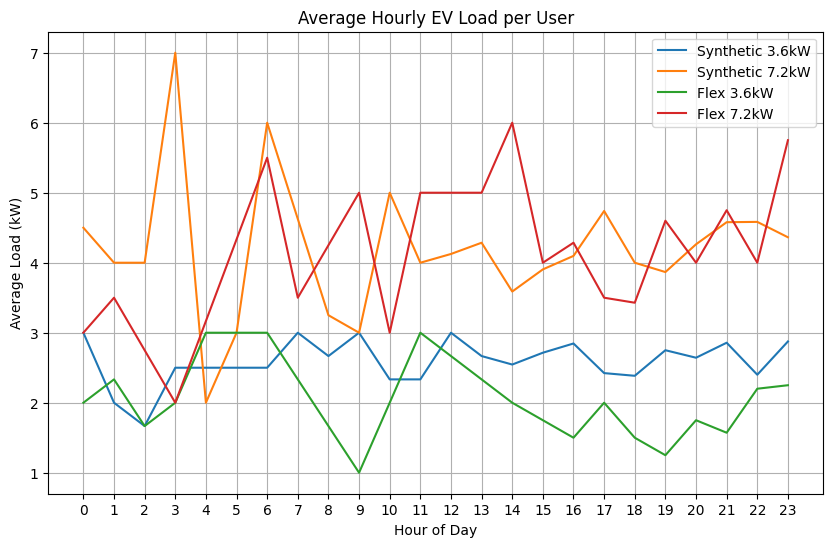

In [28]:
# Replace non-numeric values with NaN and convert to numeric
df_hourly_ev_user[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']] = df_hourly_ev_user[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']].replace('-', float('nan')).apply(pd.to_numeric, errors='coerce')

# Hourly EV Loads - Per User: Average load by hour
df_hourly_ev_user['hour'] = pd.to_datetime(df_hourly_ev_user['date_from'], format='%d.%m.%Y %H:%M', dayfirst=True).dt.hour
hourly_avg_load = df_hourly_ev_user.groupby('hour')[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_avg_load, x='hour', y='Synthetic_3_6kW', label='Synthetic 3.6kW')
sns.lineplot(data=hourly_avg_load, x='hour', y='Synthetic_7_2kW', label='Synthetic 7.2kW')
sns.lineplot(data=hourly_avg_load, x='hour', y='Flex_3_6kW', label='Flex 3.6kW')
sns.lineplot(data=hourly_avg_load, x='hour', y='Flex_7_2kW', label='Flex 7.2kW')
plt.title('Average Hourly EV Load per User')
plt.xlabel('Hour of Day')
plt.ylabel('Average Load (kW)')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

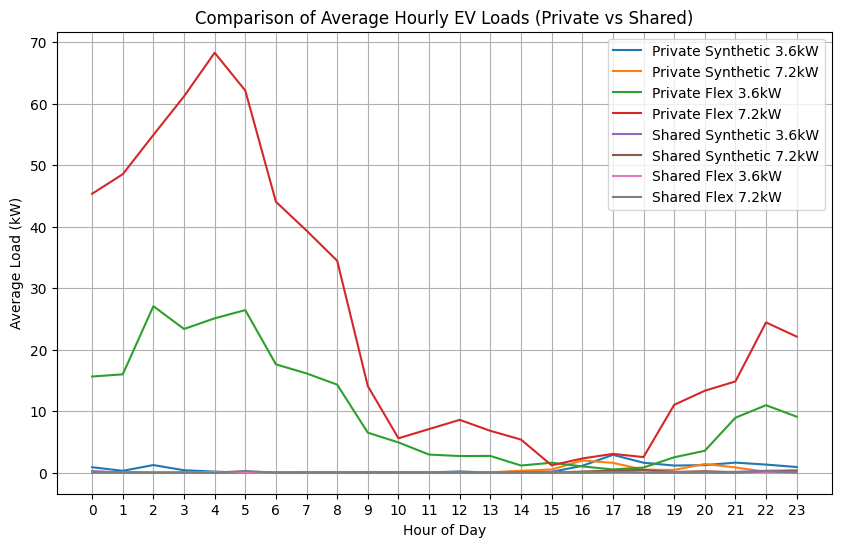

In [29]:
# Replace non-numeric values with NaN and convert to numeric
df_hourly_ev_private[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']] = df_hourly_ev_private[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']].replace('-', float('nan')).apply(pd.to_numeric, errors='coerce')
df_hourly_ev_shared[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']] = df_hourly_ev_shared[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']].replace('-', float('nan')).apply(pd.to_numeric, errors='coerce')

# Correctly parsing the date format with dayfirst=True
df_hourly_ev_private['date_from'] = pd.to_datetime(df_hourly_ev_private['date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_hourly_ev_private['hour'] = df_hourly_ev_private['date_from'].dt.hour

df_hourly_ev_shared['date_from'] = pd.to_datetime(df_hourly_ev_shared['date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_hourly_ev_shared['hour'] = df_hourly_ev_shared['date_from'].dt.hour

# Proceeding with calculations
private_hourly_avg_load = df_hourly_ev_private.groupby('hour')[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']].mean().reset_index()
shared_hourly_avg_load = df_hourly_ev_shared.groupby('hour')[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=private_hourly_avg_load, x='hour', y='Synthetic_3_6kW', label='Private Synthetic 3.6kW')
sns.lineplot(data=private_hourly_avg_load, x='hour', y='Synthetic_7_2kW', label='Private Synthetic 7.2kW')
sns.lineplot(data=private_hourly_avg_load, x='hour', y='Flex_3_6kW', label='Private Flex 3.6kW')
sns.lineplot(data=private_hourly_avg_load, x='hour', y='Flex_7_2kW', label='Private Flex 7.2kW')

sns.lineplot(data=shared_hourly_avg_load, x='hour', y='Synthetic_3_6kW', label='Shared Synthetic 3.6kW')
sns.lineplot(data=shared_hourly_avg_load, x='hour', y='Synthetic_7_2kW', label='Shared Synthetic 7.2kW')
sns.lineplot(data=shared_hourly_avg_load, x='hour', y='Flex_3_6kW', label='Shared Flex 3.6kW')
sns.lineplot(data=shared_hourly_avg_load, x='hour', y='Flex_7_2kW', label='Shared Flex 7.2kW')

plt.title('Comparison of Average Hourly EV Loads (Private vs Shared)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Load (kW)')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

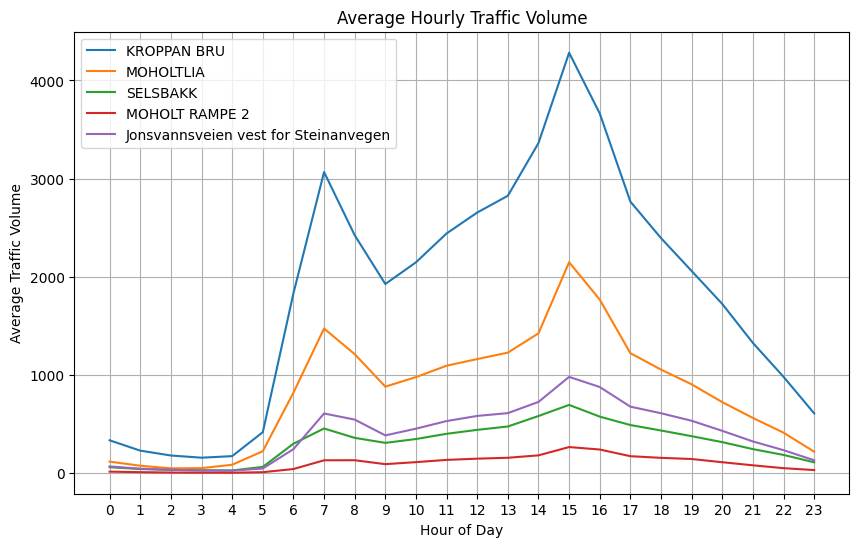

In [30]:
# Replace non-numeric values with NaN and convert to numeric
df_traffic[['KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK', 'MOHOLT RAMPE 2', 'Jonsvannsveien vest for Steinanvegen']] = df_traffic[['KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK', 'MOHOLT RAMPE 2', 'Jonsvannsveien vest for Steinanvegen']].replace('-', float('nan')).apply(pd.to_numeric, errors='coerce')

# Correctly parsing the date format with dayfirst=True
df_traffic['Date_from'] = pd.to_datetime(df_traffic['Date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_traffic['hour'] = df_traffic['Date_from'].dt.hour

# Local Traffic Distribution: Average traffic volume by hour
hourly_avg_traffic = df_traffic.groupby('hour')[['KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK', 'MOHOLT RAMPE 2', 'Jonsvannsveien vest for Steinanvegen']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_avg_traffic, x='hour', y='KROPPAN BRU', label='KROPPAN BRU')
sns.lineplot(data=hourly_avg_traffic, x='hour', y='MOHOLTLIA', label='MOHOLTLIA')
sns.lineplot(data=hourly_avg_traffic, x='hour', y='SELSBAKK', label='SELSBAKK')
sns.lineplot(data=hourly_avg_traffic, x='hour', y='MOHOLT RAMPE 2', label='MOHOLT RAMPE 2')
sns.lineplot(data=hourly_avg_traffic, x='hour', y='Jonsvannsveien vest for Steinanvegen', label='Jonsvannsveien vest for Steinanvegen')
plt.title('Average Hourly Traffic Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

In [49]:
import pandas as pd

# Load the weather data with proper splitting
df_weather = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Norway_Trondheim_ExactLoc_Weather.csv')

# Display the cleaned column names and first few rows
print("Weather Data Columns:\n", df_weather.columns)
print(df_weather.head())


Weather Data Columns:
 Index(['Unnamed: 0', 'clouds', 'datetime', 'dewpt', 'dhi', 'dni', 'ghi',
       'max_dhi', 'max_dni', 'max_ghi', 'max_temp', 'max_temp_ts', 'max_uv',
       'max_wind_dir', 'max_wind_spd', 'max_wind_spd_ts', 'min_temp',
       'min_temp_ts', 'precip', 'precip_gpm', 'pres', 'revision_status', 'rh',
       'slp', 'snow', 'snow_depth', 'solar_rad', 't_dhi', 't_dni', 't_ghi',
       't_solar_rad', 'temp', 'ts', 'wind_dir', 'wind_gust_spd', 'wind_spd'],
      dtype='object')
   Unnamed: 0  clouds    datetime  dewpt  dhi  dni  ghi  max_dhi  max_dni  \
0           0      66  2018-12-01   -1.7    5   40    6       34      288   
1           1      64  2018-12-02   -2.8    5   38    6       33      281   
2           2     100  2018-12-03   -0.7    5   37    5       33      273   
3           3      93  2018-12-04   -0.5    5   35    5       32      266   
4           4      87  2018-12-05   -1.9    5   34    5       32      260   

   max_ghi  ...  solar_rad  t_dhi  t_dn

In [50]:
# Summary statistics
print(df_weather.describe())

       Unnamed: 0      clouds       dewpt         dhi         dni         ghi  \
count  427.000000  427.000000  427.000000  427.000000  427.000000  427.000000   
mean   156.971897   74.662763    1.039578   29.702576  248.644028  128.379391   
std    113.713561   25.635374    6.338840   22.245811  184.686881  123.080478   
min      0.000000    0.000000  -13.100000    3.000000   23.000000    3.000000   
25%     43.500000   65.000000   -3.150000    7.000000   58.000000   10.000000   
50%    150.000000   84.000000    0.300000   26.000000  232.000000   86.000000   
75%    256.500000   93.500000    6.100000   51.500000  431.000000  248.000000   
max    363.000000  100.000000   17.200000   65.000000  533.000000  339.000000   

          max_dhi     max_dni     max_ghi    max_temp  ...   solar_rad  \
count  427.000000  427.000000  427.000000  427.000000  ...  427.000000   
mean    73.264637  605.053864  358.681499    8.902108  ...   69.618267   
std     31.444455  246.667611  278.598036    7.9

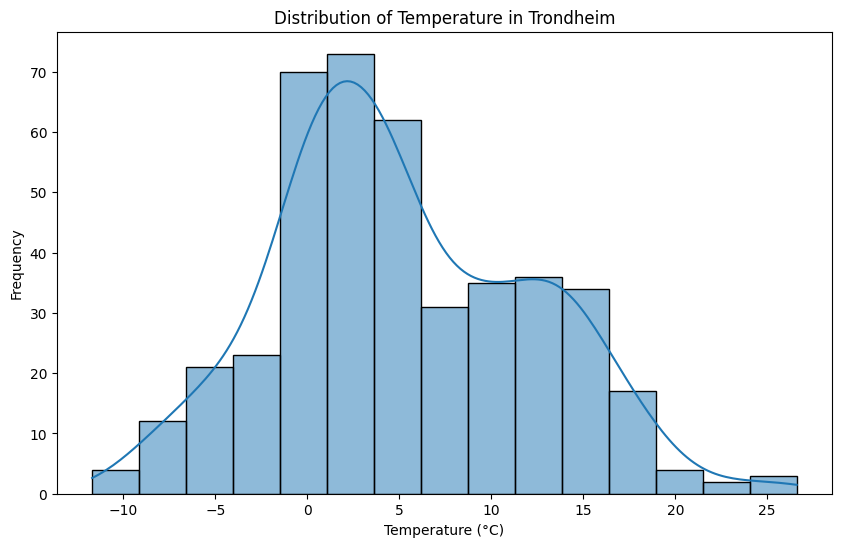

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of temperature
plt.figure(figsize=(10, 6))
sns.histplot(df_weather['temp'], kde=True)
plt.title('Distribution of Temperature in Trondheim')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

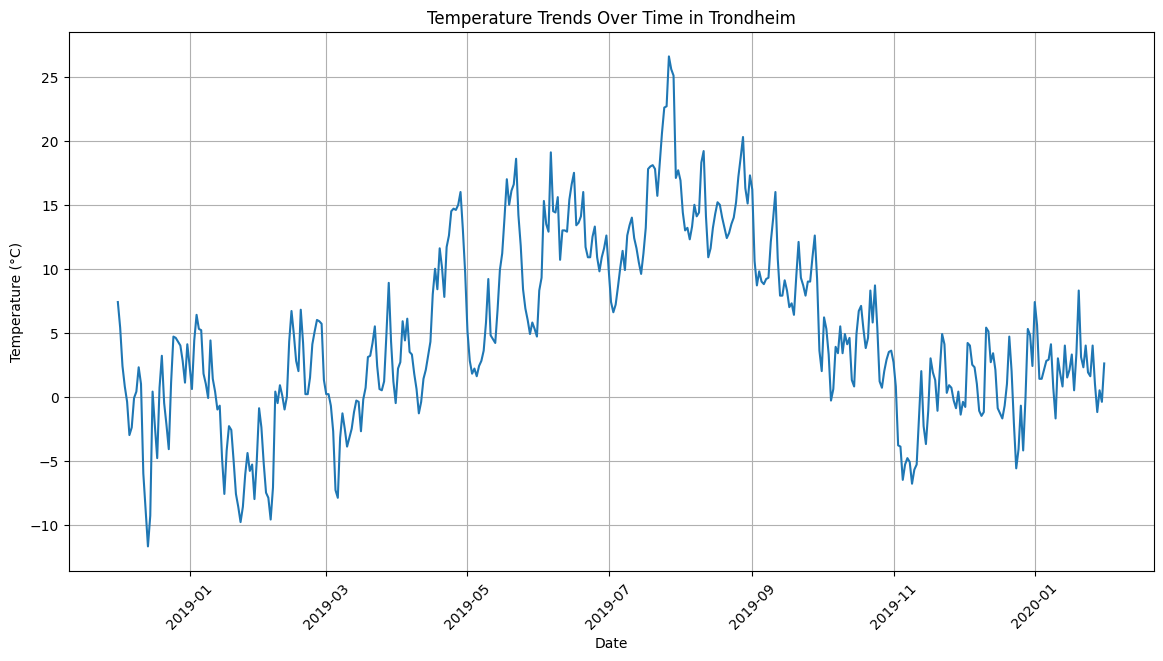

In [52]:
# Convert datetime column to pandas datetime format
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])

# Plot temperature trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_weather, x='datetime', y='temp')
plt.title('Temperature Trends Over Time in Trondheim')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Weather dataset

In [63]:
import pandas as pd

# Load the weather data
df_weather = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Norway_Trondheim_ExactLoc_Weather.csv')

# Load the EV charging reports
df_ev_reports = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 1_EV charging reports_cleaned.csv')

# Convert datetime columns to pandas datetime format
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_ev_reports['Start_plugin'] = pd.to_datetime(df_ev_reports['Start_plugin'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_ev_reports['End_plugout'] = pd.to_datetime(df_ev_reports['End_plugout'], format='%d.%m.%Y %H:%M', dayfirst=True)

# Calculate charge duration in hours
df_ev_reports['charge_duration'] = (df_ev_reports['End_plugout'] - df_ev_reports['Start_plugin']).dt.total_seconds() / 3600

# Create a timestamp for merging
df_weather['timestamp'] = df_weather['datetime']
df_ev_reports['timestamp'] = df_ev_reports['Start_plugin']

# Merge the datasets
merged_df = pd.merge(df_ev_reports, df_weather, on='timestamp', suffixes=('_ev', '_weather'))

# Display data types to inspect columns
print(merged_df.dtypes)

session_ID                    int64
Garage_ID                    object
User_ID                      object
User_type                    object
Shared_ID                    object
Start_plugin         datetime64[ns]
Start_plugin_hour             int64
End_plugout          datetime64[ns]
End_plugout_hour            float64
El_kWh                       object
Duration_hours               object
month_plugin                 object
weekdays_plugin              object
Plugin_category              object
Duration_category            object
charge_duration             float64
timestamp            datetime64[ns]
Unnamed: 0                    int64
clouds                        int64
datetime             datetime64[ns]
dewpt                       float64
dhi                           int64
dni                           int64
ghi                           int64
max_dhi                       int64
max_dni                       int64
max_ghi                       int64
max_temp                    

In [64]:
# Replace commas with dots and convert to numeric where necessary
if merged_df['El_kWh'].dtype == 'object':
    merged_df['El_kWh'] = merged_df['El_kWh'].str.replace(',', '.').astype(float)

if merged_df['temp'].dtype == 'object':
    merged_df['temp'] = merged_df['temp'].str.replace(',', '.').astype(float)

# Display the cleaned dataframe
print(merged_df.head())


   session_ID Garage_ID User_ID User_type Shared_ID Start_plugin  \
0        2986       Bl2   Bl2-5   Private       NaN   2019-10-19   
1        4861       UT2   UT2-1   Private       NaN   2019-12-11   
2        4904       UT2   UT2-1   Private       NaN   2019-12-12   

   Start_plugin_hour         End_plugout  End_plugout_hour  El_kWh  ...  \
0                  0 2019-10-19 06:45:00               6.0   15.21  ...   
1                  0 2019-12-11 12:13:00              12.0   15.17  ...   
2                  0 2019-12-12 08:35:00               8.0   13.73  ...   

  solar_rad t_dhi t_dni t_ghi t_solar_rad  temp          ts  wind_dir  \
0        11   484  4278  1319         264   5.3  1571436000        67   
1         2    92   636    85          52   5.4  1576018800       185   
2         1    89   618    82          23   5.1  1576105200       183   

   wind_gust_spd wind_spd  
0            6.0      2.8  
1           18.4      5.7  
2           13.6      6.9  

[3 rows x 53 columns

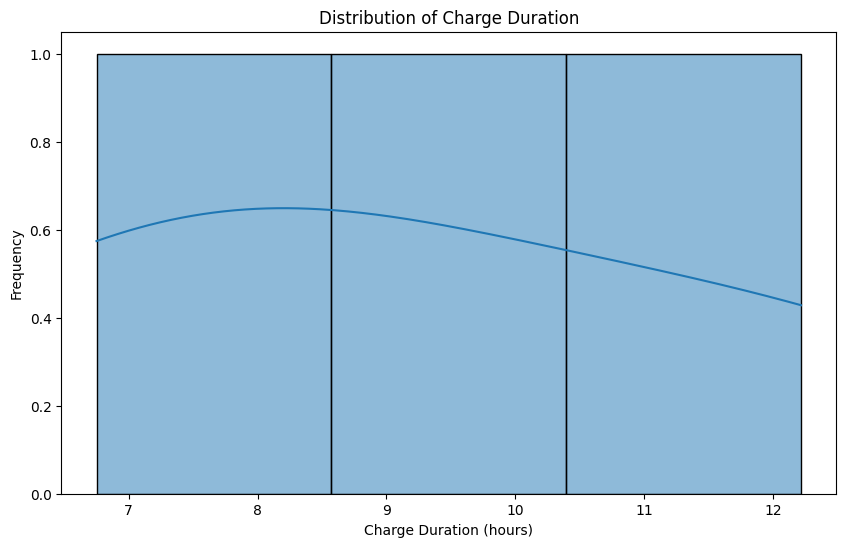

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of charge duration
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['charge_duration'], kde=True)
plt.title('Distribution of Charge Duration')
plt.xlabel('Charge Duration (hours)')
plt.ylabel('Frequency')
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9600\2543702267.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_charge_duration = merged_df.groupby(temp_bins)['charge_duration'].mean().reset_index()


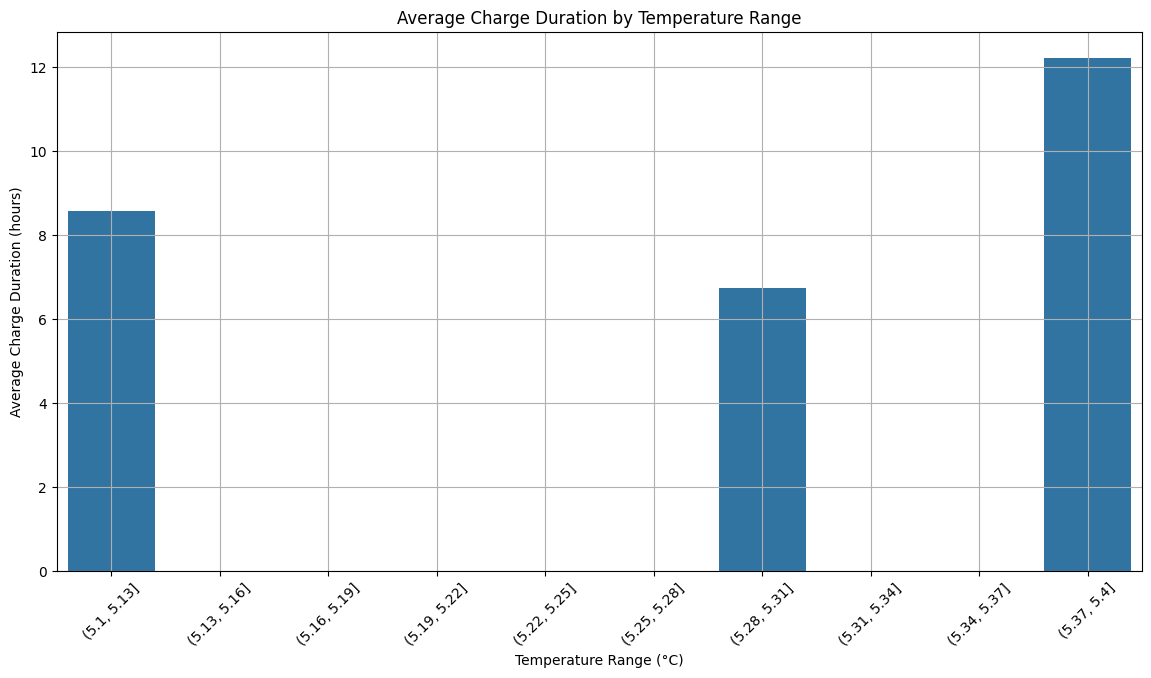

In [67]:
# Create temperature bins
temp_bins = pd.cut(merged_df['temp'], bins=10)

# Calculate average charge duration for each temperature bin
avg_charge_duration = merged_df.groupby(temp_bins)['charge_duration'].mean().reset_index()

# Bar plot of average charge duration by temperature range
plt.figure(figsize=(14, 7))
sns.barplot(x='temp', y='charge_duration', data=avg_charge_duration)
plt.title('Average Charge Duration by Temperature Range')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Average Charge Duration (hours)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


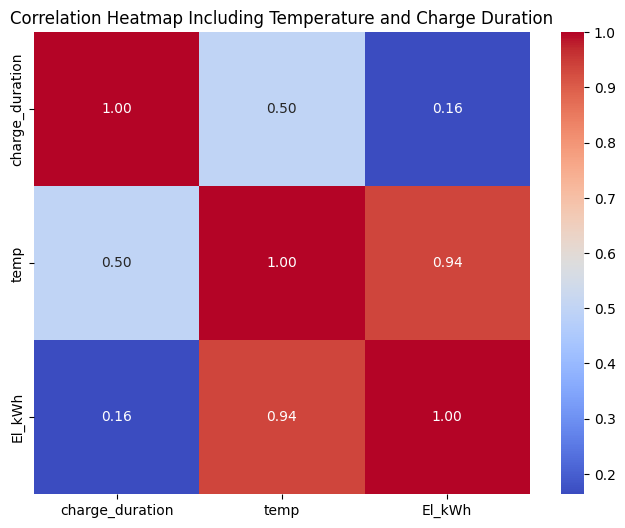

In [68]:
# Compute the correlation matrix including relevant columns
relevant_columns = ['charge_duration', 'temp', 'El_kWh']
corr_matrix = merged_df[relevant_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Including Temperature and Charge Duration')
plt.show()


In [84]:
df_ev_reports = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 1_EV charging reports_cleaned.csv')
df_hourly_ev_user = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 2_Hourly EV loads - Per user_cleaned.csv')
df_hourly_ev_private = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 3a_Hourly EV loads - Aggregated private_cleaned.csv')
df_hourly_ev_shared = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 3b_Hourly EV loads - Aggregated shared_cleaned.csv')
df_ams_garage = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 5_AMS data from garage Bl2_cleaned.csv')
df_traffic = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 6_Local traffic distribution_cleaned.csv')
df_weather = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Norway_Trondheim_ExactLoc_Weather.csv')

# Convert datetime columns to pandas datetime format
df_hourly_ev_user['date_from'] = pd.to_datetime(df_hourly_ev_user['date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_hourly_ev_private['date_from'] = pd.to_datetime(df_hourly_ev_private['date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_hourly_ev_shared['date_from'] = pd.to_datetime(df_hourly_ev_shared['date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_ams_garage['date_from'] = pd.to_datetime(df_ams_garage['date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_traffic['Date_from'] = pd.to_datetime(df_traffic['Date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_weather['Date_from'] = pd.to_datetime(df_traffic['Date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)

# Display the first few rows of each dataframe
print("Hourly EV User Data:\n", df_hourly_ev_user.head())
print("\nHourly EV Private Data:\n", df_hourly_ev_private.head())
print("\nHourly EV Shared Data:\n", df_hourly_ev_shared.head())
print("\nAMS Garage Data:\n", df_ams_garage.head())
print("\nTraffic Data:\n", df_traffic.head())

Hourly EV User Data:
             date_from           date_to User_ID  session_ID Synthetic_3_6kW  \
0 2018-12-21 10:00:00  21.12.2018 11:00  AdO3-4         1.0             0,3   
1 2018-12-21 10:00:00  21.12.2018 11:00  AdO3-4         2.0            0,87   
2 2018-12-21 11:00:00  21.12.2018 12:00  AdO3-4         3.0            1,62   
3 2018-12-21 12:00:00  21.12.2018 13:00  AdO3-4         3.0             3,6   
4 2018-12-21 13:00:00  21.12.2018 14:00  AdO3-4         3.0             3,6   

  Synthetic_7_2kW Flex_3_6kW Flex_7_2kW  
0             0,3        NaN       0,06  
1            0,87        NaN      0,114  
2            3,24        NaN        NaN  
3             7,2        NaN        NaN  
4             7,2        NaN        NaN  

Hourly EV Private Data:
             date_from  daily_hour weekday month Synthetic_3_6kW  \
0 2018-12-21 10:00:00          10  Friday   Dec            1,17   
1 2018-12-21 11:00:00          11  Friday   Dec            1,62   
2 2018-12-21 12:00:00   

In [85]:
# Merge hourly EV shared data with traffic data
df_traffic['timestamp'] = df_traffic['Date_from']
df_hourly_ev_shared['timestamp'] = df_hourly_ev_shared['date_from']

merged_ev_traffic = pd.merge(df_hourly_ev_shared, df_traffic, on='timestamp', suffixes=('_ev', '_traffic'))

# Display the merged dataframe
print(merged_ev_traffic.head())

            date_from  daily_hour   weekday month Synthetic_3_6kW  \
0 2019-01-10 00:00:00           0  Thursday   Jan               0   
1 2019-01-10 01:00:00           1  Thursday   Jan               0   
2 2019-01-10 02:00:00           2  Thursday   Jan               0   
3 2019-01-10 03:00:00           3  Thursday   Jan               0   
4 2019-01-10 04:00:00           4  Thursday   Jan               0   

  Synthetic_7_2kW Flex_3_6kW Flex_7_2kW  n_shared           timestamp  \
0               0          0          0         1 2019-01-10 00:00:00   
1               0          0          0         1 2019-01-10 01:00:00   
2               0          0          0         1 2019-01-10 02:00:00   
3               0          0          0         1 2019-01-10 03:00:00   
4               0          0          0         1 2019-01-10 04:00:00   

            Date_from           Date_to KROPPAN BRU MOHOLTLIA SELSBAKK  \
0 2019-01-10 00:00:00  10.01.2019 01:00         154        67       32  

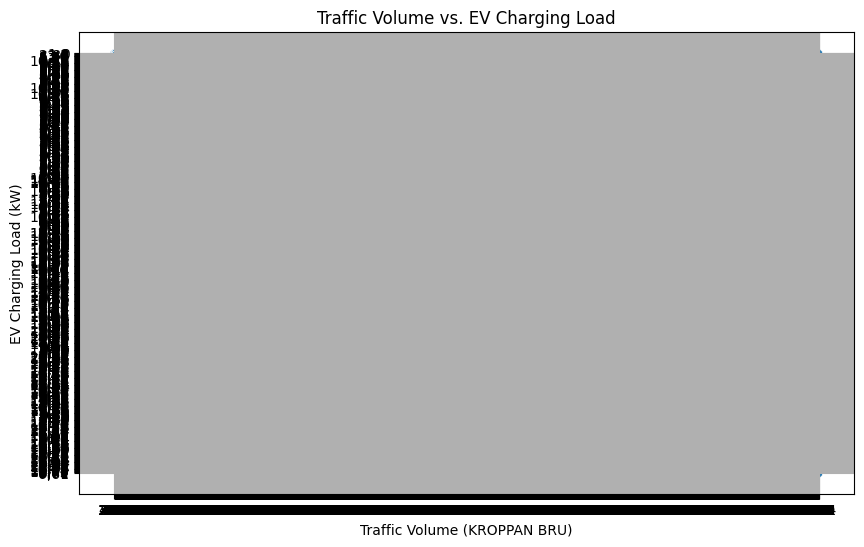

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of traffic volume vs. EV charging load
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_ev_traffic, x='KROPPAN BRU', y='Synthetic_3_6kW')
plt.title('Traffic Volume vs. EV Charging Load')
plt.xlabel('Traffic Volume (KROPPAN BRU)')
plt.ylabel('EV Charging Load (kW)')
plt.grid(True)
plt.show()

In [87]:
# Merge hourly EV shared data with weather data
df_weather['timestamp'] = pd.to_datetime(df_weather['datetime'])
merged_ev_weather = pd.merge(df_hourly_ev_shared, df_weather, on='timestamp', suffixes=('_ev', '_weather'))

# Display the merged dataframe
print(merged_ev_weather.head())

   date_from  daily_hour   weekday month Synthetic_3_6kW Synthetic_7_2kW  \
0 2019-01-10           0  Thursday   Jan               0               0   
1 2019-01-11           0    Friday   Jan               0               0   
2 2019-01-12           0  Saturday   Jan            2,27               0   
3 2019-01-13           0    Sunday   Jan               0               0   
4 2019-01-14           0    Monday   Jan               0               0   

  Flex_3_6kW Flex_7_2kW  n_shared  timestamp  ...  solar_rad  t_dhi t_dni  \
0          0          0         1 2019-01-10  ...          1    119   915   
1          0          0         3 2019-01-11  ...          2    124   954   
2        3,6        7,2         4 2019-01-12  ...          1    130   995   
3          0          0         4 2019-01-13  ...          3    136  1041   
4          0          0         4 2019-01-14  ...          3    142  1092   

   t_ghi  t_solar_rad  temp          ts  wind_dir  wind_gust_spd  wind_spd  
0  

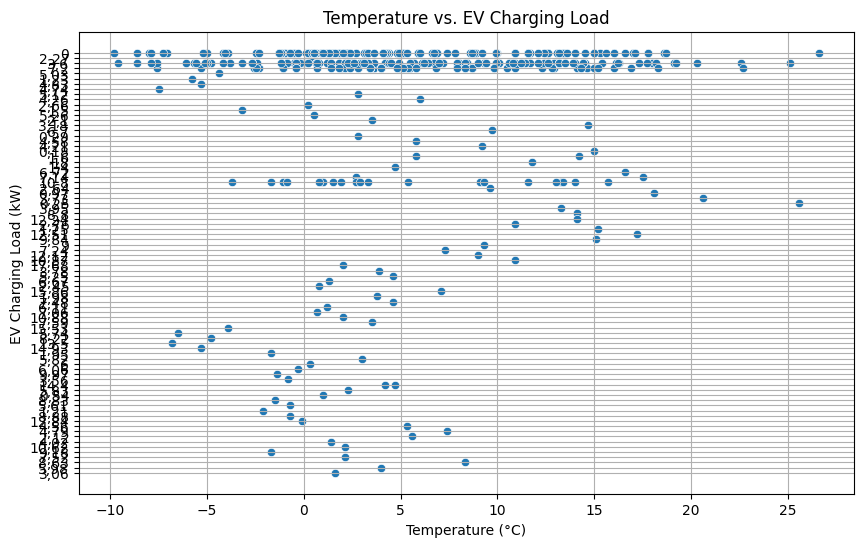

In [88]:
# Scatter plot of temperature vs. EV charging load
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_ev_weather, x='temp', y='Synthetic_3_6kW')
plt.title('Temperature vs. EV Charging Load')
plt.xlabel('Temperature (°C)')
plt.ylabel('EV Charging Load (kW)')
plt.grid(True)
plt.show()

High Charging Loads at Low and Moderate Temperatures: There are significant numbers of charging events at moderate temperatures (0°C to 15°C), with some high loads even at lower temperatures below 0°C. This suggests that EV users charge their vehicles under various temperature conditions.

Sparse Charging at Extreme Temperatures: There are fewer charging events at extreme high temperatures (>20°C) and extremely low temperatures (<-5°C). This might suggest that charging is less frequent during extreme weather conditions, which could be due to several reasons such as lower vehicle usage, reduced battery efficiency, or user preference to avoid charging in such conditions.

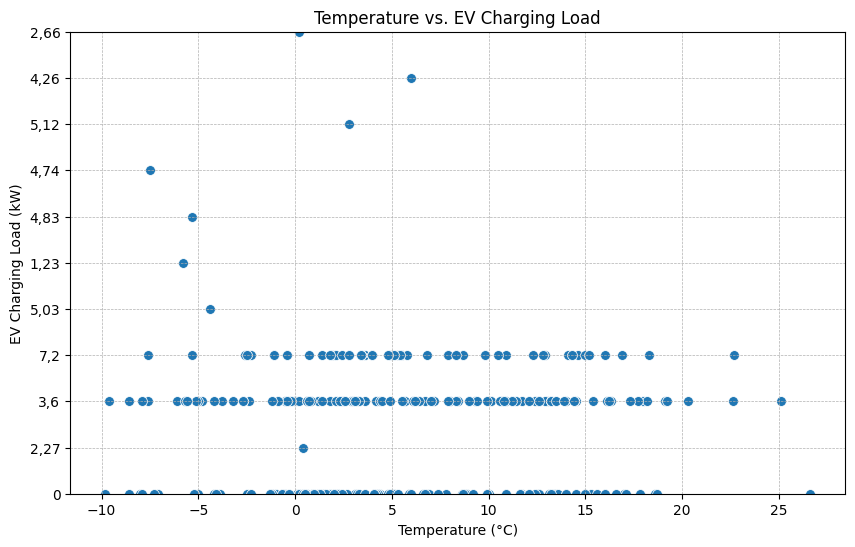

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of temperature vs. EV charging load
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_ev_weather, x='temp', y='Synthetic_3_6kW', s=50)  # Adjusting the size of the dots
plt.title('Temperature vs. EV Charging Load')
plt.xlabel('Temperature (°C)')
plt.ylabel('EV Charging Load (kW)')
plt.ylim(0, 10)  # Adjusting the y-axis range to make it more readable
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [99]:
df_ev_reports = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 1_EV charging reports_cleaned.csv')
df_hourly_ev_user = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 2_Hourly EV loads - Per user_cleaned.csv')
df_hourly_ev_private = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 3a_Hourly EV loads - Aggregated private_cleaned.csv')
df_hourly_ev_shared = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 3b_Hourly EV loads - Aggregated shared_cleaned.csv')
df_ams_garage = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 5_AMS data from garage Bl2_cleaned.csv')
df_traffic = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Dataset 6_Local traffic distribution_cleaned.csv')
df_weather = pd.read_csv('C:/Users/Administrator/OneDrive - Newcastle University/Desktop/ev_dataset/Norway_Trondheim_ExactLoc_Weather.csv')

# Convert datetime columns to pandas datetime format
df_hourly_ev_user['date_from'] = pd.to_datetime(df_hourly_ev_user['date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_hourly_ev_private['date_from'] = pd.to_datetime(df_hourly_ev_private['date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_hourly_ev_shared['date_from'] = pd.to_datetime(df_hourly_ev_shared['date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_ams_garage['date_from'] = pd.to_datetime(df_ams_garage['date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_traffic['Date_from'] = pd.to_datetime(df_traffic['Date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_weather['Date_from'] = pd.to_datetime(df_traffic['Date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)

# Convert relevant columns to numeric
df_hourly_ev_user[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']] = \
    df_hourly_ev_user[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']].apply(pd.to_numeric, errors='coerce')

df_hourly_ev_private[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']] = \
    df_hourly_ev_private[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']].apply(pd.to_numeric, errors='coerce')

df_hourly_ev_shared[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']] = \
    df_hourly_ev_shared[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']].apply(pd.to_numeric, errors='coerce')

df_ams_garage[['AMS_kWh', 'Synthetic_3_6kW', 'Synthetic_7_2kW']] = \
    df_ams_garage[['AMS_kWh', 'Synthetic_3_6kW', 'Synthetic_7_2kW']].apply(pd.to_numeric, errors='coerce')

df_traffic[['KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK']] = \
    df_traffic[['KROPPAN BRU', 'MOHOLTLIA', 'SELSBAKK']].apply(pd.to_numeric, errors='coerce')


# Display the first few rows of each dataframe
print("Hourly EV User Data:\n", df_hourly_ev_user.head())
print("\nHourly EV Private Data:\n", df_hourly_ev_private.head())
print("\nHourly EV Shared Data:\n", df_hourly_ev_shared.head())
print("\nAMS Garage Data:\n", df_ams_garage.head())
print("\nTraffic Data:\n", df_traffic.head())

Hourly EV User Data:
             date_from           date_to User_ID  session_ID  Synthetic_3_6kW  \
0 2018-12-21 10:00:00  21.12.2018 11:00  AdO3-4         1.0              NaN   
1 2018-12-21 10:00:00  21.12.2018 11:00  AdO3-4         2.0              NaN   
2 2018-12-21 11:00:00  21.12.2018 12:00  AdO3-4         3.0              NaN   
3 2018-12-21 12:00:00  21.12.2018 13:00  AdO3-4         3.0              NaN   
4 2018-12-21 13:00:00  21.12.2018 14:00  AdO3-4         3.0              NaN   

   Synthetic_7_2kW  Flex_3_6kW  Flex_7_2kW  
0              NaN         NaN         NaN  
1              NaN         NaN         NaN  
2              NaN         NaN         NaN  
3              NaN         NaN         NaN  
4              NaN         NaN         NaN  

Hourly EV Private Data:
             date_from  daily_hour weekday month  Synthetic_3_6kW  \
0 2018-12-21 10:00:00          10  Friday   Dec              NaN   
1 2018-12-21 11:00:00          11  Friday   Dec              NaN 

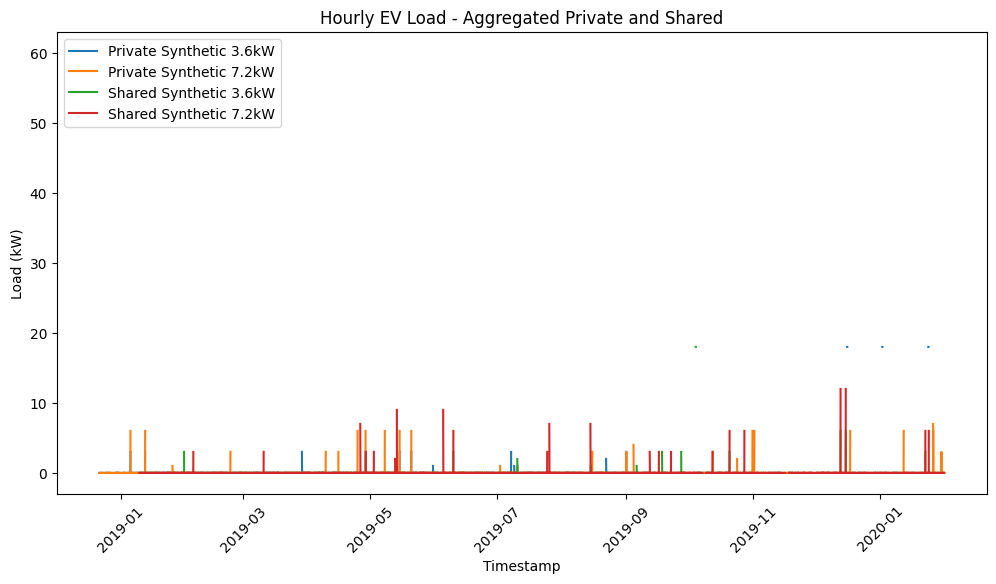

In [100]:
# Plot hourly aggregated loads for private and shared stations
plt.figure(figsize=(12, 6))
plt.plot(df_hourly_ev_private['date_from'], df_hourly_ev_private['Synthetic_3_6kW'], label='Private Synthetic 3.6kW')
plt.plot(df_hourly_ev_private['date_from'], df_hourly_ev_private['Synthetic_7_2kW'], label='Private Synthetic 7.2kW')
plt.plot(df_hourly_ev_shared['date_from'], df_hourly_ev_shared['Synthetic_3_6kW'], label='Shared Synthetic 3.6kW')
plt.plot(df_hourly_ev_shared['date_from'], df_hourly_ev_shared['Synthetic_7_2kW'], label='Shared Synthetic 7.2kW')
plt.xlabel('Timestamp')
plt.ylabel('Load (kW)')
plt.title('Hourly EV Load - Aggregated Private and Shared')
plt.legend()
plt.xticks(rotation=45)
plt.show()

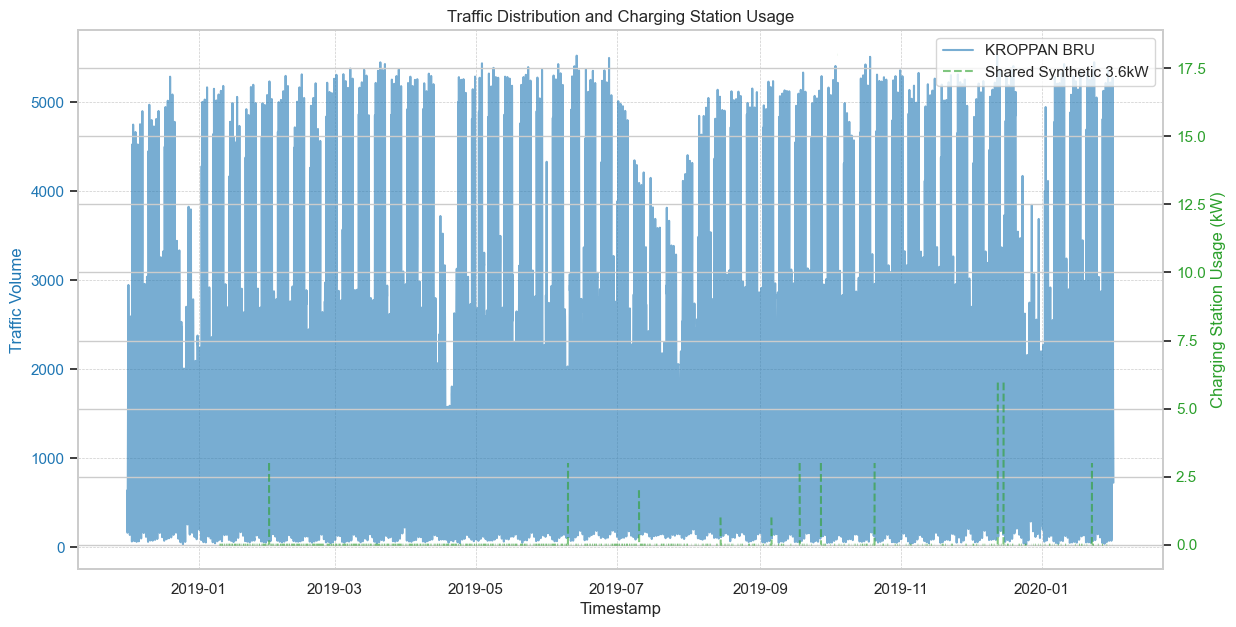

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Plot traffic distribution and charging station usage
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the traffic volume
color = 'tab:blue'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Traffic Volume', color=color)
ax1.plot(df_traffic['Date_from'], df_traffic['KROPPAN BRU'], color=color, label='KROPPAN BRU', alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis to plot the charging station usage
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Charging Station Usage (kW)', color=color)
ax2.plot(df_hourly_ev_shared['date_from'], df_hourly_ev_shared['Synthetic_3_6kW'], color=color, label='Shared Synthetic 3.6kW', linestyle='--', alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

# Add a legend
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Add grid for better readability
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Rotate the x-axis labels for better readability
plt.title('Traffic Distribution and Charging Station Usage')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [115]:
pip install scipy

     ---------------------------------------- 46.2/46.2 MB 8.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [119]:
from scipy.stats.stats import pearsonr
import numpy as np

# Convert datetime columns to pandas datetime format
df_hourly_ev_shared['date_from'] = pd.to_datetime(df_hourly_ev_shared['date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)
df_traffic['Date_from'] = pd.to_datetime(df_traffic['Date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)

# Convert relevant columns to numeric
df_hourly_ev_shared[['Synthetic_3_6kW']] = df_hourly_ev_shared[['Synthetic_3_6kW']].apply(pd.to_numeric, errors='coerce')
df_traffic[['KROPPAN BRU']] = df_traffic[['KROPPAN BRU']].apply(pd.to_numeric, errors='coerce')

# Merge dataframes on the timestamp
df_combined = pd.merge(df_hourly_ev_shared[['date_from', 'Synthetic_3_6kW']], df_traffic[['Date_from', 'KROPPAN BRU']],
                       left_on='date_from', right_on='Date_from').drop(columns='Date_from')

# Handle NaN and inf values
df_combined = df_combined.dropna()
df_combined = df_combined[~df_combined.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

# Display the first few rows of the combined dataframe
print(df_combined.head())

# Calculate Pearson correlation coefficient
corr, _ = pearsonr(df_combined['KROPPAN BRU'], df_combined['Synthetic_3_6kW'])
print(f'Pearson correlation coefficient: {corr:.2f}')

            date_from  Synthetic_3_6kW  KROPPAN BRU
0 2019-01-10 00:00:00              0.0        154.0
1 2019-01-10 01:00:00              0.0         86.0
2 2019-01-10 02:00:00              0.0         87.0
3 2019-01-10 03:00:00              0.0         98.0
4 2019-01-10 04:00:00              0.0        146.0
Pearson correlation coefficient: 0.00


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9600\210024725.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


At lag 0, the correlation is positive but relatively low, indicating a weak immediate relationship between traffic volume and charging station usage. As we move to negative lags, the correlations fluctuate, with a few points showing slightly higher positive correlations. This suggests that charging usage might have some minor predictability from prior traffic data, but the relationship is not strong. Similarly, at positive lags, the correlations also fluctuate, with a notable peak around lag 20, suggesting a slightly stronger relationship where traffic volume could predict charging usage about 20 hours later. Overall, the correlations are generally weak across all lags, implying that traffic volume is not a strong predictor of charging station usage in this dataset.

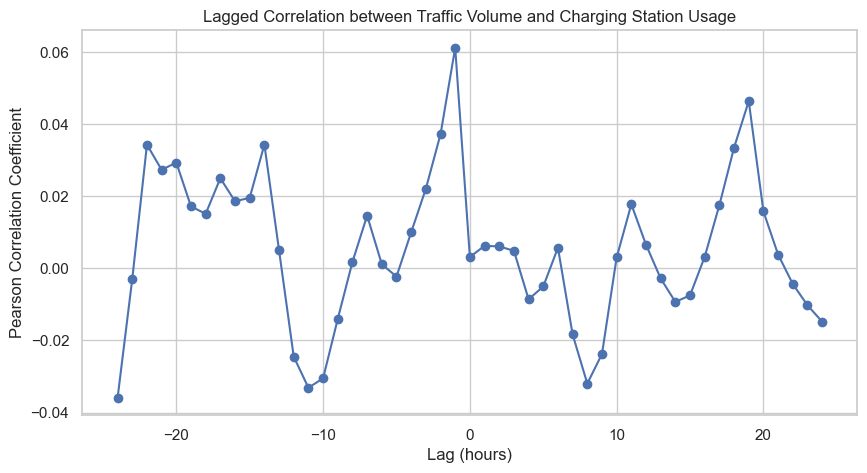

In [120]:
# Function to calculate correlation with lag
def calculate_lagged_correlation(data1, data2, max_lag):
    correlations = []
    for lag in range(-max_lag, max_lag + 1):
        if lag < 0:
            corr, _ = pearsonr(data1[:lag], data2[-lag:])
        elif lag > 0:
            corr, _ = pearsonr(data1[lag:], data2[:-lag])
        else:
            corr, _ = pearsonr(data1, data2)
        correlations.append(corr)
    return correlations

# Calculate lagged correlations
max_lag = 24  # maximum lag of 24 hours
lagged_correlations = calculate_lagged_correlation(df_combined['KROPPAN BRU'], df_combined['Synthetic_3_6kW'], max_lag)

# Plot lagged correlations
plt.figure(figsize=(10, 5))
plt.plot(range(-max_lag, max_lag + 1), lagged_correlations, marker='o')
plt.title('Lagged Correlation between Traffic Volume and Charging Station Usage')
plt.xlabel('Lag (hours)')
plt.ylabel('Pearson Correlation Coefficient')
plt.grid(True)
plt.show()

In the morning hours (6 AM to 9 AM), the correlations are generally positive, peaking slightly around 8 AM. This indicates a mild relationship between morning traffic and charging station usage.

During the middle of the day (10 AM to 3 PM), correlations fluctuate around zero, with some hours showing slight negative values, indicating little to no consistent relationship between traffic volume and charging usage.

In the late afternoon to early evening (4 PM to 8 PM), correlations again turn positive, peaking around 5 PM and 6 PM. This period shows a stronger positive relationship, suggesting that evening traffic might be a better predictor of charging station usage.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9600\2228975892.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  hourly_correlations = df_combined.groupby('hour').apply(lambda x: pearsonr(x['KROPPAN BRU'], x['Synthetic_3_6kW'])[0])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9600\2228975892.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hourly_correlations = df_combined.groupby('hour').apply(lambda x: pearsonr(x['KROPPAN BRU'], x['Synthetic_3_6kW'])[0])


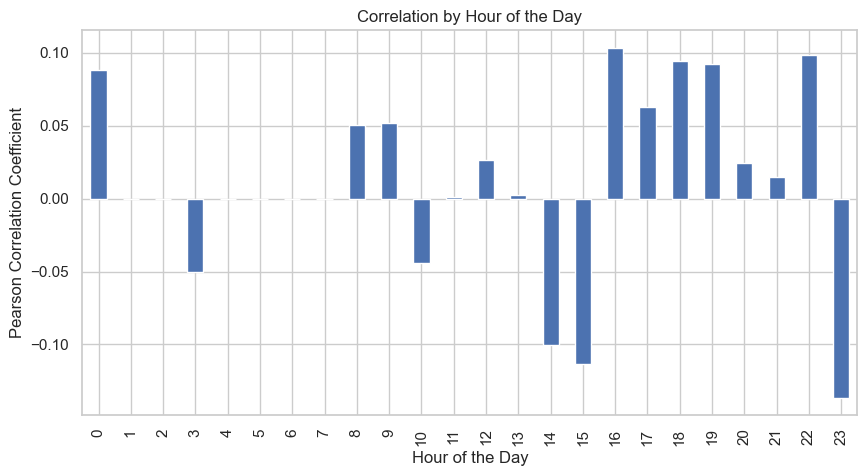

In [121]:
# Extract hour of the day
df_combined['hour'] = df_combined['date_from'].dt.hour

# Calculate correlation for different times of the day
hourly_correlations = df_combined.groupby('hour').apply(lambda x: pearsonr(x['KROPPAN BRU'], x['Synthetic_3_6kW'])[0])

# Plot hourly correlations
plt.figure(figsize=(10, 5))
hourly_correlations.plot(kind='bar')
plt.title('Correlation by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Pearson Correlation Coefficient')
plt.grid(True)
plt.show()

On Sunday (day 0), the correlation is slightly negative, around -0.03, indicating a weak inverse relationship between traffic volume and charging usage. This suggests that higher traffic on Sundays might be associated with slightly lower charging station usage.

On Monday (day 1), the correlation is very close to zero, indicating almost no relationship between traffic volume and charging station usage.

From Tuesday (day 2) to Wednesday (day 3), the correlation coefficients are positive but relatively low, around 0.01 to 0.02. This indicates a weak positive relationship, where increased traffic might be associated with a slight increase in charging usage.

On Thursday (day 4), the correlation is effectively zero, suggesting no significant relationship between traffic volume and charging station usage.

On Friday (day 5) and Saturday (day 6), the correlations are noticeably higher, around 0.08 and 0.06, respectively. These days show a stronger positive relationship between traffic volume and charging station usage, implying that traffic on these days is more predictive of charging station usage compared to other days of the week.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9600\3191192559.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  daily_correlations = df_combined.groupby('day_of_week').apply(lambda x: pearsonr(x['KROPPAN BRU'], x['Synthetic_3_6kW'])[0])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9600\3191192559.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_correlations = df_combined.groupby('day_of_week').apply(lambda x: pearsonr(x['KROPPAN BRU'], x['Synthetic_3_6kW'])[0])


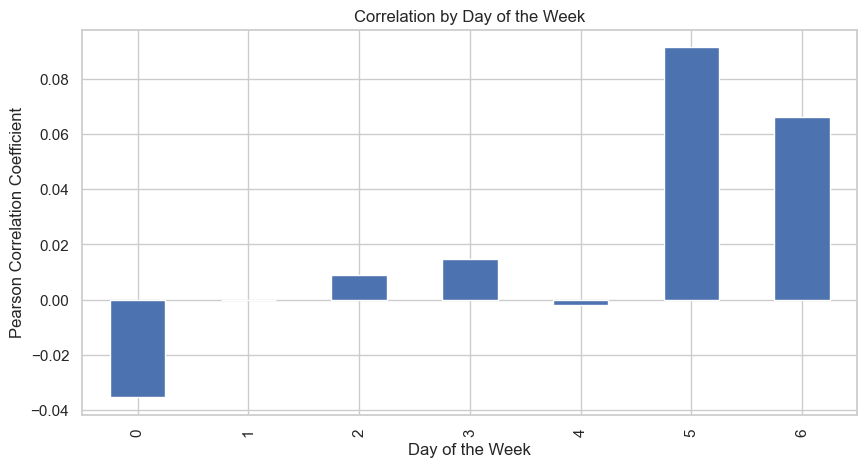

In [122]:
# Extract day of the week
df_combined['day_of_week'] = df_combined['date_from'].dt.dayofweek

# Calculate correlation for different days of the week
daily_correlations = df_combined.groupby('day_of_week').apply(lambda x: pearsonr(x['KROPPAN BRU'], x['Synthetic_3_6kW'])[0])

# Plot daily correlations
plt.figure(figsize=(10, 5))
daily_correlations.plot(kind='bar')
plt.title('Correlation by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Pearson Correlation Coefficient')
plt.grid(True)
plt.show()

In [127]:
# Convert datetime columns to pandas datetime format
df_hourly_ev_user['date_from'] = pd.to_datetime(df_hourly_ev_user['date_from'], format='%d.%m.%Y %H:%M', dayfirst=True)

# Convert relevant columns to numeric
df_hourly_ev_user[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']] = df_hourly_ev_user[['Synthetic_3_6kW', 'Synthetic_7_2kW', 'Flex_3_6kW', 'Flex_7_2kW']].apply(pd.to_numeric, errors='coerce')

# Set datetime index
df_hourly_ev_user.set_index('date_from', inplace=True)

# Plot average hourly EV load for individual users
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_hourly_ev_user.resample('H').mean())
plt.title('Average Hourly EV Load - Per User')
plt.xlabel('Time')
plt.ylabel('Load (kW)')
plt.legend(['Synthetic 3.6kW', 'Synthetic 7.2kW', 'Flex 3.6kW', 'Flex 7.2kW'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9600\2078358255.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sns.lineplot(data=df_hourly_ev_user.resample('H').mean())


TypeError: agg function failed [how->mean,dtype->object]

<Figure size 1400x700 with 0 Axes>